In [102]:
import pandas as pd
import numpy as np

In [103]:
df = pd.read_csv("../Data/daily-min-temperatures.csv", header= 0 , parse_dates= [0])

In [104]:
train , test = df.Temp[:df.shape[0] - 7] , df.Temp[df.shape[0]-7 : ]

In [105]:
from statsmodels.tsa.ar_model import AutoReg

In [106]:
data = train
predict = []

In [107]:
for t_data in test:
    model = AutoReg(data , lags= range(1,21))
    model_fit = model.fit()
    y  = model_fit.predict(start= len(data) , end= len(train) + len(test) - 1)
    # print(y.values[0])
    predict.append(y.values[0])
    data = np.append(data , t_data)
    data = pd.Series(data)

In [108]:
predict

[11.901806013543691,
 13.643416403568914,
 14.307411049811929,
 13.356923321108473,
 13.2763721852605,
 13.281002905802294,
 14.484154782335194]

In [109]:
test

3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64

In [110]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

In [111]:
mean_absolute_percentage_error(test, predict)

0.06679100634137379

In [112]:
mean_absolute_error(test, predict)

0.9474350004090356

In [113]:
from matplotlib import pyplot as plt

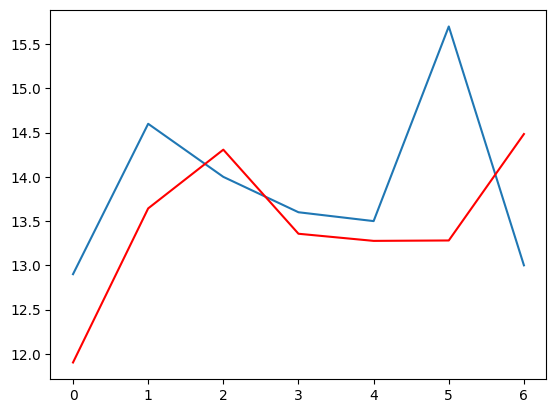

In [115]:
plt.plot(test.values)
plt.plot(predict, color = "red")